In [ ]:
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.optimize as optimize
from decimal import Decimal
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from scipy import optimize
import urllib
import frigidum
from frigidum.examples import tsp
from scipy import spatial

## First Task

### Defining Auxiliary Functions

In [2]:
# function used to generat y function of x
def fun(x):
    return (1/( pow(x,2) -3*x + 2 ))

In [3]:
# Approximation fun
def approximation(params,x):
        a, b,c,d = params
        return ((a*x+b)/( pow((x),2) +c*x + d ))

In [4]:
# Mean Suare error with rational approximation
def MLS_rational(params, x,y):
    return sum((y - approximation(params,x))**2)

In [5]:
# Rational approximation for lm method
def rational_lm(params, x,y):
    return ((y - approximation(params,x))**2)

### Initializing

In [6]:
size_of_array = 1001
error =0.001
delta_normal=np.random.rand(size_of_array)    #random samples samples from a standard Normal distribution (mean=0, stdev=1).   
x=[]   #Intializing the x vector
y=[]   #Intializing the y vector
y_clear =[] #Intializing the clear y vector
for k in range(size_of_array):    #According to the proposed formulas, calculating x and y with noise (y), ckear y without noise
    current_x=3*k/1000
    x.append(current_x)
    fun_current=fun(current_x)
    if (fun_current<-100):
        y_clear.append(-100)
        y.append(-100+delta_normal[k])
    elif (fun_current<100):
        y_clear.append(fun_current)
        y.append(fun_current+delta_normal[k])
    else:
        y_clear.append(100)
        y.append(100+delta_normal[k])
x=np.array(x)        #transforming to np.array for future uses.
y=np.array(y)
y_clear=np.array(y_clear)

### Applying minimizing methods

In [7]:
# Levenberg Marquardt algorithm
res_lm = optimize.least_squares(rational_lm, [0.1, 0.1,0.1,0.1], args=(x,y), xtol=error, method='lm')
# Nelder-Mead algorithm
res_nm = optimize.minimize(MLS_rational, [0.1, 0.1,0.1,0.1], args=(x,y), tol=error, method='Nelder-Mead')
# Simulated Annealing algorithm
res_anneal = optimize.dual_annealing(MLS_rational, ((-3, 3), (-3, 3), (-3, 3), (-3, 3)), args=(x,y))
# Differential Evolution algorithm
res_evol = optimize.differential_evolution(MLS_rational, ((-3, 3), (-3, 3), (-3, 3), (-3, 3)), args=(x,y), tol=error)

### saving the numerical results and print them in a table

In [8]:
result=[]
result.append([res_lm.x[0],res_lm.x[1],res_lm.x[2],res_lm.x[3],0,res_lm.nfev,0])
result.append([res_nm.x[0],res_nm.x[1],res_nm.x[2],res_nm.x[3],res_nm.fun,res_nm.nfev,res_nm.nit])
result.append([res_anneal.x[0],res_anneal.x[1],res_anneal.x[2],res_anneal.x[3],res_anneal.fun,res_anneal.nfev,res_anneal.nit])
result.append([res_evol.x[0],res_evol.x[1],res_evol.x[2],res_evol.x[3],res_evol.fun,res_evol.nfev,res_evol.nit])

In [9]:
# Printing a table with results
rowIDs=[ 'Levenberg Marquardt ','Nelder-Mead','Simulated Annealing','Differential Evolution ']
print(tabulate(result, headers=['a','b','c','d','function value','function claculation','num of iteration'],numalign ='center',showindex=rowIDs))

                            a         b         c         d       function value    function claculation    num of iteration
----------------------  ---------  --------  --------  --------  ----------------  ----------------------  ------------------
Levenberg Marquardt     -0.259051  0.263017  -1.95988  0.960392         0                   265                    0
Nelder-Mead             -1.63634   1.63719   -2.00078  1.00084        153111                370                   210
Simulated Annealing     -1.00122   1.00172   -2.00086  1.00088        135908                9176                  1000
Differential Evolution  -0.988345  0.98882   -2.00087  1.00089        135920                7915                  130


### Plotting the results

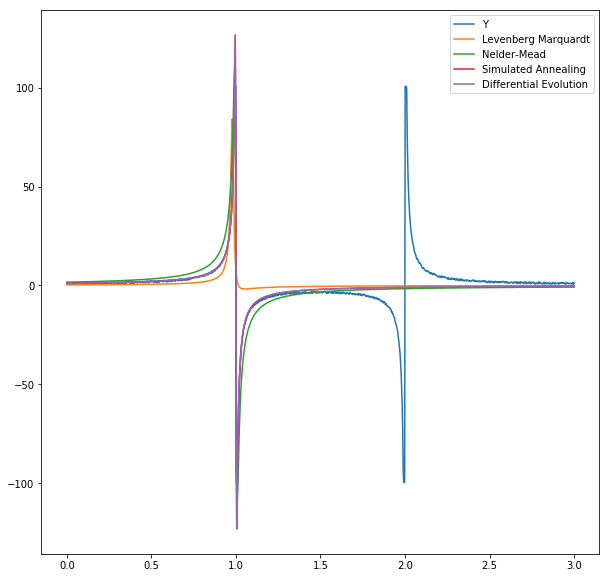

In [26]:
plt.figure(figsize=(10, 10))
plt.plot(x, y)
plt.plot(x, approximation( res_lm.x,x))
plt.plot(x, approximation( res_nm.x,x))
plt.plot(x, approximation( res_anneal.x,x))
plt.plot(x, approximation( res_evol.x,x))
plt.legend(['Y','Levenberg Marquardt','Nelder-Mead', 'Simulated Annealing','Differential Evolution'])

#### Plotting each reult individually

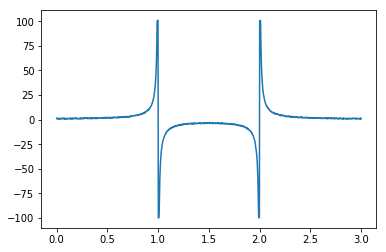

In [13]:
plt.figure()
plt.plot(x, y)

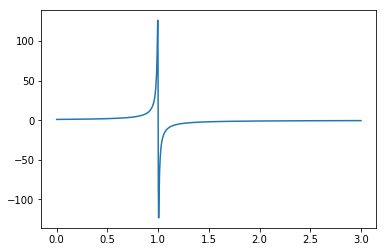

In [29]:
plt.figure()
plt.plot(x, approximation( res_evol.x,x))

## Second Task : Travelling Salesman Problem

The pcb442 is a TSP problem instance with 442 cities/vertices, from http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/index.html.
In the seek of applying Simulated Annealing method to solve a Travelling Salesman Problem, in the following a pre-implemented solution for the STP problem is called. 
The pre-implemented solution applied Simulated Annealing method. 
the package is 'frigidum.examples.tsp' and the function to find the solution 'rigidum.sa'
This pre-implemented solution can be found in the link:
https://pypi.org/project/frigidum/ 

In [19]:
# Choosing Dataset and reading it
filename = 'pcb442.tsp'
file_link = 'http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/pcb442.tsp'
urllib.request.urlretrieve(file_link,filename)
with open(filename) as input_file:
    dataset = input_file.readlines()[6:-1]
dataset = [line.strip() for line in dataset]
dataset = [[line.split(' ')[1].strip(), line.split(' ')[2].strip()] for line in dataset]
dataset = np.array(dataset, dtype=float)

In [20]:
#Defining a function to creat a random first path, this function will be passed to 'frigidum.sa' as a callable function for the random path for 1st iteration.
def random_first_path():
    path=np.arange(0, dataset.shape[0])
    np.random.seed(15)
    np.random.shuffle(path)
    return path

In [21]:
# Defining a random start
path_first_iteration = random_first_path()

In [22]:
# Finding the Solution
local_opt = frigidum.sa(random_start=random_first_path,
           objective_function=tsp.objective_function,
           neighbours=[tsp.euclidian_bomb_and_fix, tsp.euclidian_nuke_and_fix, tsp.route_bomb_and_fix, tsp.route_nuke_and_fix, tsp.random_disconnect_vertices_and_fix],
           copy_state=frigidum.annealing.naked,
           T_start=10**5,
           alpha=.92,
           T_stop=0.001,
           repeats=10**2,
           post_annealing = None)

T: 0.001, M: 0.00, O_min: 52756.0780, O_current: 52756.0780: 100%|██████████| 221/221 [05:30<00:00,  1.50s/cooling]

---
Neighbour Statistics: 
(proportion of proposals which got accepted *and* changed the objective function)
   euclidian_bomb_and_fix           : 0.224757
   euclidian_nuke_and_fix           : 0.254362
   route_bomb_and_fix               : 0.250226
   route_nuke_and_fix               : 0.253778
   random_disconnect_vertices_and_  : 0.137097
---
(Local) Minimum Objective Value Found: 
   52756.07797641


In [23]:
# printing the results
print('First Iteration Road')
print(path_first_iteration)
print('**********\nFinal Iteration Road')
print('Solution:', local_opt[0])
print('Min Cost:', local_opt[1])

First Iteration Road
[324 220  67 319  21 126 421  40  25  73 354 341 158 250  13 239 311 304
 399 307 167  55 347 320  83 363 368 139 257 299   2 308 328 170 210   4
 241  64 103 436 247 200  33 191 417 412 204 287  44 175 129 369 106 322
 288 371 333 356  77 235 431 345 292 194 146 135 131  97  24 214 395 422
 178 148 261 400  65 105  18 192 305 278 116  89 124 286   6 402  69 111
  35  54 268 409 251 334 294 275 267  47 298  58  60 110 265 233 115 321
 228 314 193 297 342 414 142  86 301   9  80  38 149 276 125 393 285 190
 389 407 216 255  12 379 127 303 254 418  52 382 109 258  79 426 420  95
 238 441 338 138  61 122 172  91 206  99 350 434 185  92  98 411   3 327
 201 230  94  56 132 202 388 153 141 145  31 174   7 272 197 181 225 209
 100  30 187 343 256 189 222  50 164 435 227 264 348 262  20 373  71 101
  49 372 152  75 374  93 269  70 386 186 425 367 211 385 253  11 117 147
 121 408 163 248 315 184 378 244 404 282   8 183 271 270 154  84 387 176
  36 165  59 144 150 128 419 1

Text(0.5, 1.0, 'First iteration path')

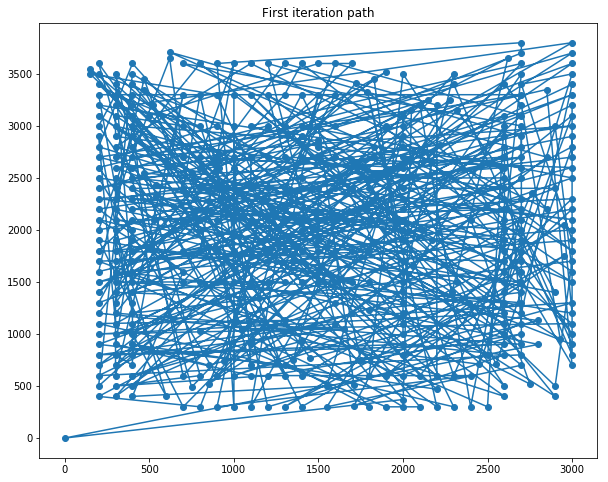

In [24]:
# Plotting first iteration
plt.figure(figsize=(10, 8))
plt.scatter(dataset[:, 0][path_first_iteration], dataset[:, 1][path_first_iteration], )
plt.plot(dataset[:, 0][path_first_iteration], dataset[:, 1][path_first_iteration], )
plt.title('First iteration path')

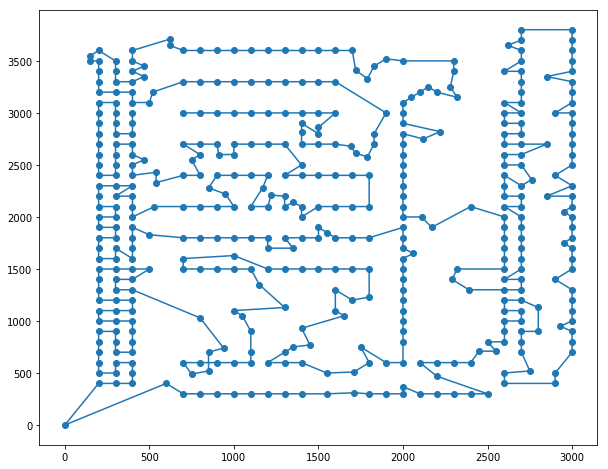

In [25]:
# Plotting final iteration
plt.figure(figsize=(10, 8))
plt.scatter(dataset[:, 0][local_opt[0]], dataset[:, 1][local_opt[0]])
plt.plot(dataset[:, 0][local_opt[0]], dataset[:, 1][local_opt[0]])